In [2]:
import numpy as np
import gym_change
import gym
from keras.models import Sequential
from keras.layers import Dense, InputLayer
import time as time

%matplotlib notebook

In [3]:
def make_colormap(num_ids,use_cmap='viridis'):
    num_colors = (num_ids)
    cm = plt.cm.get_cmap(name=use_cmap)
    currentColors = [cm(1.*i/num_colors) for i in range(num_colors)]
    return currentColors


In [24]:
env = gym.make('change1-v0',c=10,L=500)

In [33]:
env.state[0]

60.0

In [32]:
env.step(9)

(array([6.00000000e+01, 3.38348131e-15, 5.00000000e+01, 4.28847981e-16,
        4.00000000e+01, 5.43554328e-17, 3.00000000e+01, 6.88941818e-18,
        2.00000000e+01, 8.73216906e-19]), -0.022712406931757335, False, {})

In [35]:
model = Sequential()
model.add(InputLayer(batch_input_shape=(1, 10)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
#model.load_weights('simple_change_finder.h5')

In [ ]:
env.observation_space.bounded_above

In [ ]:
tlist = np.arange(10)
print (tlist)
print (tlist[-1])
print (tlist[-2])


In [ ]:
np.roll(tlist,2)

In [ ]:
newtlist = tlist.copy
for i in np.arange(8,-1,-1):
    newtlist[int(i)] = tlist[int(i+2)]
    
newtlist

Need to get observables out....

In [55]:
# now execute the q learning
y = 0.99
eps = 0.5
decay_factor = 0.999
r_avg_list = []

num_episodes = 10

for i in range(num_episodes):
    env.random_reset()
    s = env.state
    eps *= decay_factor
    #if i % 50 == 0:
    #    print("Episode {} of {}".format(i + 1, num_episodes))
    print("Episode {} of {}".format(i + 1, num_episodes))    
    done = False
    r_sum = 0
    while not done:
        if np.random.random() < eps:
            a = np.random.randint(0, 10)
        else:
            a = np.argmax(model.predict(np.identity(10)[int(s[0]):int(s[0] + 1)]))
        new_s, r, done, _ = env.step(a)
        #print ('state '+str(new_s))
        target = r + y * np.max(model.predict(np.identity(10)[int(new_s[0]):int(new_s[0] + 1)]))
        target_vec = model.predict(np.identity(10)[int(s[0]):int(s[0] + 1)])[0]
        target_vec[a] = target
        model.fit(np.identity(10)[int(s[0]):int(s[0] + 1)], target_vec.reshape(-1, 10), epochs=1, verbose=0)
        s = new_s
        r_sum += r
    r_avg_list.append(r_sum)
fancy_beep(2)

Episode 1 of 10


ValueError: zero-size array to reduction operation maximum which has no identity

In [56]:
np.identity(10)[int(new_s[0]):int(new_s[0] + 1)]

array([], shape=(0, 10), dtype=float64)

In [60]:
int(new_s[0]+1)

13

<IPython.core.display.Javascript object>


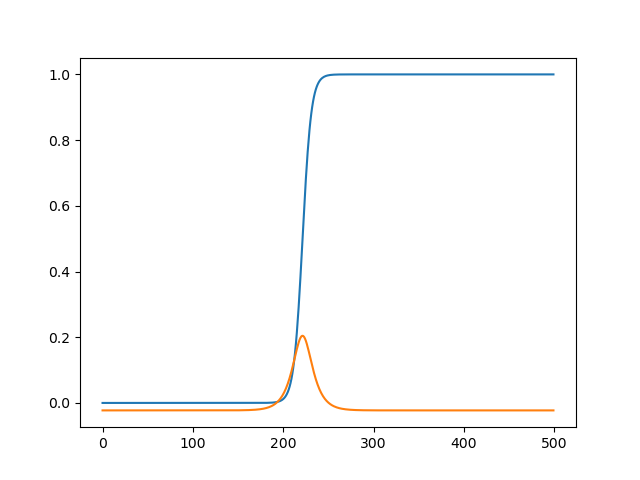

In [26]:
env.random_reset()
plt.figure()
plt.plot(env.x, env.value_map)
plt.plot(env.x, env.score_map)

In [ ]:
env.power = .5